# Análise de perfil de servidores da educação infantil no estado de São Paulo - 2023

#### Uma ONG pretende compreender melhor o perfil dos profissionais que atuam na educação infantil na rede de ensino do estado de SP para promover ações, especialmente em relação à diversidade racial e de gênero em cargos de liderança. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_servidores = pd.read_csv("perfilservidor23.csv", sep = ';', encoding='utf-8')

## Exploração inicial da base de dados e tratamento

In [3]:
print(f'A base de dados contém {df_servidores.shape[0]} observações e {df_servidores.shape[1]} atributos.')
display(df_servidores.head())
display(df_servidores.tail())


A base de dados contém 86575 observações e 49 atributos.


,DATA_BASE_EOL,ANO_REFERENCIA,CD_CAR_SERV_SME,MES_NASC,ANO_NASC,IDADE,CD_SEXO,CD_MUNICIPIO_NASC,DC_MUNICIPIO_NASC,UF_MUNICIPIO_NASC,...,CD_UNIDADE_FUNCAO,CD_FUNCAO,DC_FUNCAO,DT_INICIO_FUNCAO,CD_UNIDADE_SOBREPOSTO,CD_SOBREPOSTO,DC_SOBREPOSTO,DT_INICIO_SOBREPOSTO,ACUMULO_AMBITO,ACUMULO_SITUACAO_SEGUNDO_VINCULO
0,Dez de 2023,2023,"3,00727E+14",10,1990,33,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dez de 2023,2023,"3,71731E+14",1,1972,51,F,"9,36274E+15",GUARULHOS,SP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dez de 2023,2023,"3,71731E+14",2,1975,48,F,"9,35474E+15",SAO PAULO,SP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dez de 2023,2023,"3,71731E+14",5,1991,32,F,"9,35474E+15",SAO PAULO,SP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Efetivo
4,Dez de 2023,2023,"3,71731E+14",3,1984,39,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DATA_BASE_EOL,ANO_REFERENCIA,CD_CAR_SERV_SME,MES_NASC,ANO_NASC,IDADE,CD_SEXO,CD_MUNICIPIO_NASC,DC_MUNICIPIO_NASC,UF_MUNICIPIO_NASC,...,CD_UNIDADE_FUNCAO,CD_FUNCAO,DC_FUNCAO,DT_INICIO_FUNCAO,CD_UNIDADE_SOBREPOSTO,CD_SOBREPOSTO,DC_SOBREPOSTO,DT_INICIO_SOBREPOSTO,ACUMULO_AMBITO,ACUMULO_SITUACAO_SEGUNDO_VINCULO
86570,Dez de 2023,2023,"9,37174E+15",2,1979,44,F,"9,35474E+15",SAO PAULO,SP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86571,Dez de 2023,2023,"8,37175E+15",7,1978,45,F,"3,18737E+14",XIQUE-XIQUE,BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86572,Dez de 2023,2023,"9,37174E+15",2,1979,44,F,"9,35474E+15",SAO PAULO,SP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86573,Dez de 2023,2023,"3,71736E+14",10,1988,35,F,"9,35474E+15",SAO PAULO,SP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86574,Dez de 2023,2023,"9,37174E+15",3,1983,40,F,"3,55731E+14",BIRITINGA,BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Tratando os dados

#### Verificando a presença de observações duplicadas e excluindo-as

In [4]:
display(df_servidores.duplicated().sum())
df_servidores = df_servidores.drop_duplicates()


6

#### Excluindo colunas redundantes e desnecessárias, além das que contêm uma quantidade de valores nulos tão alta que a invalida para a análise. 

In [5]:
display(df_servidores['DATA_BASE_EOL'].unique())
display(df_servidores['ANO_REFERENCIA'].unique())

array(['Dez de 2023'], dtype=object)

array([2023])

In [6]:
df_servidores.columns

Index(['DATA_BASE_EOL', 'ANO_REFERENCIA', 'CD_CAR_SERV_SME', 'MES_NASC',
       'ANO_NASC', 'IDADE', 'CD_SEXO', 'CD_MUNICIPIO_NASC',
       'DC_MUNICIPIO_NASC', 'UF_MUNICIPIO_NASC', 'CD_PAIS_NASC',
       'DC_PAIS_NASC', 'CD_MUNICIPIO_RES', 'DC_MUNICIPIO_RES',
       'UF_MUNICIPIO_RES', 'CD_RACA_COR', 'DC_RACA_COR', 'CD_DEF', 'DC_DEF',
       'NIVEL_FORM', 'DC_SIT_FUNC', 'CD_CARGO_BASE', 'DC_CARGO_BASE',
       'CD_AREA_ATUACAO_BASE', 'DC_AREA_ATUACAO_BASE', 'DT_INICIO_CARGO_BASE',
       'CD_UNIDADE_BASE', 'TP_UNIDADE_BASE', 'DC_UNIDADE_BASE',
       'SIGLA_LOTACAO', 'TP_LOTACAO', 'CD_CARGO_ATUAL', 'DC_CARGO_ATUAL',
       'CD_AREA_ATUACAO_ATUAL', 'DC_AREA_ATUACAO_ATUAL', 'CD_UNIDADE_ATUAL',
       'TP_UNIDADE_ATUAL', 'DC_UNIDADE_ATUAL', 'SIGLA_ATUAL',
       'CD_UNIDADE_FUNCAO', 'CD_FUNCAO', 'DC_FUNCAO', 'DT_INICIO_FUNCAO',
       'CD_UNIDADE_SOBREPOSTO', 'CD_SOBREPOSTO', 'DC_SOBREPOSTO',
       'DT_INICIO_SOBREPOSTO', 'ACUMULO_AMBITO',
       'ACUMULO_SITUACAO_SEGUNDO_VINCULO'],
   

In [7]:
df_servidores = df_servidores.drop(columns = ['DATA_BASE_EOL', 'ANO_REFERENCIA', 'CD_CAR_SERV_SME', 'DT_INICIO_CARGO_BASE', 'DT_INICIO_FUNCAO', 'DT_INICIO_SOBREPOSTO',
                                              'CD_MUNICIPIO_NASC', 'CD_PAIS_NASC', 'CD_MUNICIPIO_RES', 'CD_RACA_COR', 'CD_DEF', 'CD_CARGO_BASE',
                                              'CD_AREA_ATUACAO_BASE', 'CD_UNIDADE_BASE', 'CD_CARGO_ATUAL', 'CD_AREA_ATUACAO_ATUAL', 'CD_UNIDADE_ATUAL',
                                                'CD_UNIDADE_FUNCAO', 'CD_FUNCAO','CD_UNIDADE_SOBREPOSTO', 'CD_UNIDADE_ATUAL','CD_SOBREPOSTO', 
                                                'SIGLA_LOTACAO', 'TP_LOTACAO', 'SIGLA_ATUAL', 'DC_UNIDADE_ATUAL', 'DC_UNIDADE_BASE'])

#### A função abaixo identifica as colunas que apresentam uma proporção de dados nulos maior ou igual a 20% e as exclui, pois elas não contêm uma quantidade significativa de dados que as tornem relevantes para a análise.

In [8]:
def excluir_colunas_com_muitos_nulos(df):
    for coluna in df.columns:
        total_nulos = df[coluna].isnull().sum()
        percentual_nulos = (total_nulos/len(df)) * 100
        if percentual_nulos >= 20:
            df = df.drop(columns = [coluna]) 
    return df        


In [9]:
df_servidores = excluir_colunas_com_muitos_nulos(df_servidores)

#### Verificando o tipo dos dados

In [10]:
df_servidores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86569 entries, 0 to 86574
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MES_NASC               86569 non-null  int64 
 1   ANO_NASC               86569 non-null  int64 
 2   IDADE                  86569 non-null  int64 
 3   CD_SEXO                86569 non-null  object
 4   DC_MUNICIPIO_NASC      80793 non-null  object
 5   UF_MUNICIPIO_NASC      80793 non-null  object
 6   DC_PAIS_NASC           86517 non-null  object
 7   DC_MUNICIPIO_RES       86274 non-null  object
 8   UF_MUNICIPIO_RES       86274 non-null  object
 9   DC_RACA_COR            86569 non-null  object
 10  DC_DEF                 86569 non-null  object
 11  NIVEL_FORM             86437 non-null  object
 12  DC_SIT_FUNC            86569 non-null  object
 13  DC_CARGO_BASE          86569 non-null  object
 14  DC_AREA_ATUACAO_BASE   86569 non-null  object
 15  TP_UNIDADE_BASE        8

In [11]:
df_servidores = df_servidores.fillna('SEM INFORMAÇÃO')

#### Criando a variável "IDADE_ATUALIZADA", que apresenta as idades atuais dos servidores.

In [12]:
from datetime import datetime

data_atual= datetime.today()

def calcular_idade(mes, ano):
    ano_atual = data_atual.year
    mes_atual = data_atual.month
    idade = ano_atual - ano
    if mes > mes_atual:
        idade -= 1  # Ainda não fez aniversário este ano
    return idade

# Aplicar a função linha por linha
df_servidores['IDADE_ATUALIZADA'] = df_servidores.apply(lambda x: calcular_idade(x['MES_NASC'], x['ANO_NASC']), axis=1)
#axis=0 → opera por coluna (movimento vertical, linha por linha dentro da coluna)
#axis=1 → opera por linha (movimento horizontal, coluna por coluna dentro da linha)
df_servidores

,MES_NASC,ANO_NASC,IDADE,CD_SEXO,DC_MUNICIPIO_NASC,UF_MUNICIPIO_NASC,DC_PAIS_NASC,DC_MUNICIPIO_RES,UF_MUNICIPIO_RES,DC_RACA_COR,DC_DEF,NIVEL_FORM,DC_SIT_FUNC,DC_CARGO_BASE,DC_AREA_ATUACAO_BASE,TP_UNIDADE_BASE,DC_CARGO_ATUAL,DC_AREA_ATUACAO_ATUAL,TP_UNIDADE_ATUAL,IDADE_ATUALIZADA
0,10,1990,33,F,SEM INFORMAÇÃO,SEM INFORMAÇÃO,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,CEU EMEI,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,CEU EMEI,34
1,1,1972,51,F,GUARULHOS,SP,BRASIL,GUARULHOS,SP,BRANCA,NAO POSSUI,BACHARELADO,EFETIVO,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEFM,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEFM,53
2,2,1975,48,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,LICENCIATURA PLENA,EFETIVO,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEI,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEI,50
3,5,1991,32,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,BRANCA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEI,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEI,34
4,3,1984,39,F,SEM INFORMAÇÃO,SEM INFORMAÇÃO,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86570,2,1979,44,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,PRETA,NAO POSSUI,LICENCIATURA PLENA,CONTRATADO,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,DIR EDUC,PROF.ED.INF.E ENS.FUND.I,ENSINO FUNDAMENTAL I E INFANTIL,EMEBS,46
86571,7,1978,45,F,XIQUE-XIQUE,BA,BRASIL,SAO PAULO,SP,PARDA,NAO POSSUI,LICENCIATURA PLENA,CONTRATADO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,DIR EDUC,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,46
86572,2,1979,44,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,BRANCA,NAO POSSUI,LICENCIATURA PLENA,CONTRATADO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,DIR EDUC,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,46
86573,10,1988,35,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,RECUSOU INFORMAR,NAO POSSUI,LICENCIATURA PLENA,CONTRATADO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,DIR EDUC,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,DIR EDUC,36


In [13]:
df_servidores = df_servidores.drop(columns = 'IDADE')

### Agora vamos explorar cada variável categórica mais a fundo, para identificar qualquer necessidade de tratamento nelas.

In [14]:
variaveis_categoricas = df_servidores.select_dtypes(exclude='number').columns
variaveis_categoricas

Index(['CD_SEXO', 'DC_MUNICIPIO_NASC', 'UF_MUNICIPIO_NASC', 'DC_PAIS_NASC',
       'DC_MUNICIPIO_RES', 'UF_MUNICIPIO_RES', 'DC_RACA_COR', 'DC_DEF',
       'NIVEL_FORM', 'DC_SIT_FUNC', 'DC_CARGO_BASE', 'DC_AREA_ATUACAO_BASE',
       'TP_UNIDADE_BASE', 'DC_CARGO_ATUAL', 'DC_AREA_ATUACAO_ATUAL',
       'TP_UNIDADE_ATUAL'],
      dtype='object')

In [15]:
for coluna in variaveis_categoricas:
    print(f"\nColuna: {coluna}")
    print(pd.Series(df_servidores[coluna].unique()))


Coluna: CD_SEXO
0    F
1    M
2    f
3    m
dtype: object

Coluna: DC_MUNICIPIO_NASC
0              SEM INFORMAÇÃO
1                   GUARULHOS
2                   SAO PAULO
3                     ITAPAGE
4       SAO BERNARDO DO CAMPO
                ...          
2551                REDENTORA
2552                   ITALVA
2553         SANTANA DO MATOS
2554                  ORIENTE
2555     SAO GABRIEL DA PALHA
Length: 2556, dtype: object

Coluna: UF_MUNICIPIO_NASC
0     SEM INFORMAÇÃO
1                 SP
2                 CE
3                 PB
4                 MS
5                 MG
6                 PR
7                 AL
8                 PE
9                 BA
10                PI
11                MA
12                RN
13                DF
14                RJ
15                MT
16                PA
17                ES
18                GO
19                SE
20                AM
21                RS
22                SC
23                TO
24                RO
25  

#### Identificamos que a base de dados está levemente corrompida e há um problema de padronização no atributo 'CD_SEXO'. Diante disso, vamos fazer as devidas substituições para corrigir e padronizar os dados.

In [16]:
substituicoes = {'f': 'F', 'm' : 'M'}
df_servidores['CD_SEXO'] = df_servidores['CD_SEXO'].replace(substituicoes)
df_servidores['CD_SEXO'].unique()

array(['F', 'M'], dtype=object)

In [17]:
substituicoes = {'CORÃƒâ€°IA': 'COREIA', 'NIGÃƒâ€°RIA': 'NIGÉRIA', 'BOLÃƒÂVIA': 'BOLÌVIA', 'LÃƒÂBANO': 'LÍBANO', 'JAPÃƒÆ’O': 'JAPÃO', 'SÃƒÂRIA':'SÍRIA', 
                 'BONAIRE SAINT EUSTATIUS E SABA': 'BONAIRE, SANTO EUSTÁQUIO E SABA'}

df_servidores['DC_PAIS_NASC'] = df_servidores['DC_PAIS_NASC'].replace(substituicoes)
df_servidores['DC_PAIS_NASC'] = df_servidores['DC_PAIS_NASC'].fillna('SEM INFORMAÇÃO')
df_servidores['DC_PAIS_NASC'].unique()

array(['BRASIL', 'NIGÉRIA', 'PORTUGAL', 'SEM INFORMAÇÃO', 'ALEMANHA',
       'PERU', 'VENEZUELA', 'CHILE', 'ARGENTINA', 'CHINA', 'URUGUAI',
       'SAARA ESPANHOL', 'PARAGUAI', 'ESPANHA', 'LÍBANO', 'CUBA', 'JAPÃO',
       'SÍRIA', 'RESERVADO', 'BOLÌVIA', 'BOTSUANA', 'ANGOLA',
       'COREIA DO SUL', 'COREIA', 'SERRA LEOA',
       'BONAIRE, SANTO EUSTÁQUIO E SABA'], dtype=object)

In [18]:
substituicoes = {'MAGISTÃƒâ€°RIO': 'MAGISTÉRIO', '1Ã‚Âº GRAU OU INFERIOR': '1. GRAU OU INFERIOR'}

df_servidores['NIVEL_FORM'] = df_servidores['NIVEL_FORM'].replace(substituicoes)
df_servidores['NIVEL_FORM'] = df_servidores['NIVEL_FORM'].fillna('SEM INFORMAÇÃO')
df_servidores['NIVEL_FORM'].unique()

array(['POS GRADUACAO LATO SENSU', 'BACHARELADO', 'LICENCIATURA PLENA',
       'MAGISTÉRIO', '1. GRAU OU INFERIOR', 'MESTRADO', 'DOUTORADO',
       'LICENCIATURA CURTA', 'SEM INFORMAÇÃO'], dtype=object)

### Análise exploratória dos servidores que atuam na área da educação infantil

#### Primeiramente, criaremos um dataframe somente com os dados dos servidores que atuam nesta área.

In [19]:
df = df_servidores[df_servidores['DC_AREA_ATUACAO_BASE'] ==  'EDUCACAO INFANTIL']
display(df.head())
display(df.shape)

,MES_NASC,ANO_NASC,CD_SEXO,DC_MUNICIPIO_NASC,UF_MUNICIPIO_NASC,DC_PAIS_NASC,DC_MUNICIPIO_RES,UF_MUNICIPIO_RES,DC_RACA_COR,DC_DEF,NIVEL_FORM,DC_SIT_FUNC,DC_CARGO_BASE,DC_AREA_ATUACAO_BASE,TP_UNIDADE_BASE,DC_CARGO_ATUAL,DC_AREA_ATUACAO_ATUAL,TP_UNIDADE_ATUAL,IDADE_ATUALIZADA
4,3,1984,F,SEM INFORMAÇÃO,SEM INFORMAÇÃO,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,41
12,8,1978,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEU CEI,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEU CEI,46
33,7,1984,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,40
40,1,1974,F,SAO PAULO,SP,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEI DIRET,51
44,2,1984,F,EMBU DAS ARTES,SP,BRASIL,SAO PAULO,SP,NAO INFORMADA,NAO POSSUI,POS GRADUACAO LATO SENSU,EFETIVO,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEMEI,PROF.DE ED.INFANTIL,EDUCACAO INFANTIL,CEMEI,41


(15692, 19)

In [20]:
df[df['DC_AREA_ATUACAO_BASE'] == 'EDUCACAO INFANTIL']['DC_CARGO_ATUAL'].value_counts(normalize=True).reset_index()

,DC_CARGO_ATUAL,proportion
0,PROF.DE ED.INFANTIL,0.961127
1,ASSISTENTE DE DIRETOR DE ESCOLA,0.019819
2,COORDENADOR PEDAGOGICO,0.006564
3,ASSISTENTE TECNICO DE EDUCACAO I,0.005863
4,AUXILIAR DE DESENVOLVIMENTO INFANTIL,0.002677
5,DIRETOR DE ESCOLA,0.002167
6,GESTOR DE EQUIPAMENTO PUBLICO II,0.000574
7,DIRETOR I,0.000319
8,CHEFE DE NUCLEO DE ACAO EDUCACIONAL,0.000255
9,ASSESSOR II,0.000255


In [21]:
df[df['DC_AREA_ATUACAO_BASE'] == 'EDUCACAO INFANTIL']['DC_CARGO_BASE'].value_counts(normalize=True).reset_index()

,DC_CARGO_BASE,proportion
0,PROF.DE ED.INFANTIL,0.997323
1,AUXILIAR DE DESENVOLVIMENTO INFANTIL,0.002677


#### Analisando as variáveis "DC_CARGO_ATUAL" E "DC_CARGO_BASE", descobrimos que a maioria esmagadora de servidores da área da educação infantil atuam como professores, e que uma porcentagem muito pequena deles muda de cargo ao longo da carreira. Os dados nos mostram que 99,7% dos servidores ingressam na área da educação infantil como professores, e que 96% ocupam este cargo atualmente. 

## Perfil demográfico

### Distribuição de servidores por gênero

/tmp/ipykernel_4851/4176138081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'CD_SEXO', palette = 'ocean')


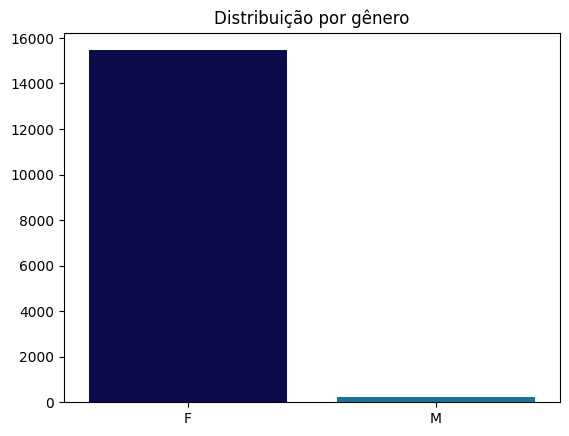

In [22]:
sns.countplot(data = df, x = 'CD_SEXO', palette = 'ocean')
plt.title('Distribuição por gênero')
plt.xlabel('')
plt.ylabel('')
plt.show();


#### Como observado, a maioria esmagadora dos servidores da educação infantil no estado de São Paulo são do gênero feminino.

In [23]:
df_nacionalidade = df['DC_PAIS_NASC'].value_counts().reset_index(name = 'Quantidade')
df_nacionalidade

,DC_PAIS_NASC,Quantidade
0,BRASIL,15679
1,SEM INFORMAÇÃO,8
2,PERU,2
3,VENEZUELA,1
4,CHILE,1
5,URUGUAI,1


In [24]:
df_nacionalidade_estrageira = df_nacionalidade.query("DC_PAIS_NASC != 'BRASIL'")
percentual_estrangeiros = round((df_nacionalidade_estrageira['Quantidade'].sum() / df_nacionalidade['Quantidade'].sum()) * 100, 2)
percentual_estrangeiros

0.08

#### E quantidade de servidores estrangeiros é praticamente irrelevante, correspondendo a 0,08% do total.

/tmp/ipykernel_4851/2910218360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'DC_RACA_COR', palette = 'ocean', order = ordem)


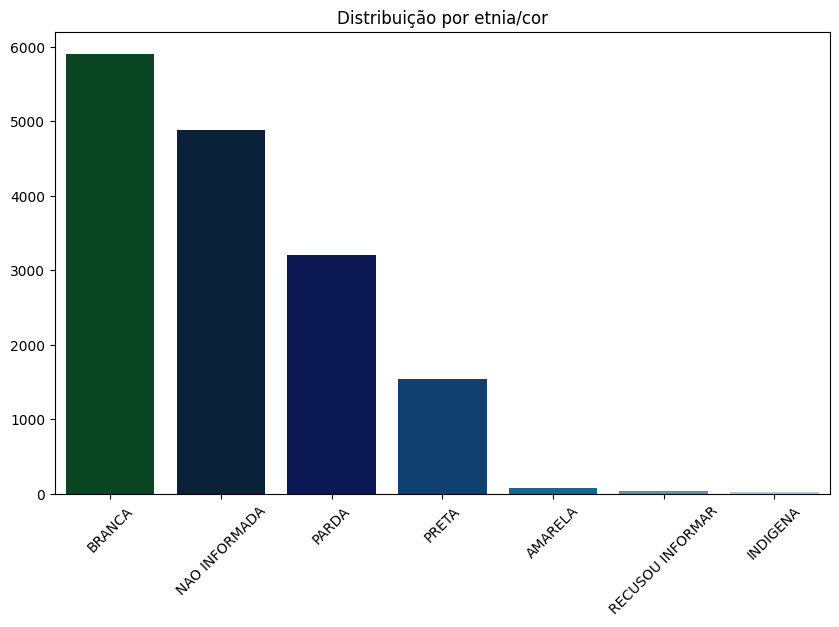

In [25]:
ordem = df['DC_RACA_COR'].value_counts().sort_values(ascending=False).index
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'DC_RACA_COR', palette = 'ocean', order = ordem)
plt.title('Distribuição por etnia/cor')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show();

#### Infelizmente, existe uma quantidade grande de servidores que não informou a cor/etnia, o que prejudica um pouco a análise deste atributo. Porém, daqueles que responderam, obervamos que predominam os que se autodeclararam brancos e negros (pretos e pardos).

In [26]:
df_deficiencia = df['DC_DEF'].value_counts(dropna = False).reset_index() #transforma a Series em um DataFrame
df_deficiencia.columns = ['Deficiência', 'Quantidade']
df_deficiencia

,Deficiência,Quantidade
0,NAO POSSUI,15664
1,DEFIC. FISICA NAO CADEIRANTE,10
2,BAIXA VISAO OU VISAO SUBNORMAL,9
3,SURDEZ LEVE/MODERADA,4
4,SURDEZ SEVERA/PROFUNDA,2
5,DEFICIENCIA MULTIPLA,1
6,CEGUEIRA,1
7,AUTISMO,1


In [27]:
df_pcd = df_deficiencia.query("Deficiência != 'NAO POSSUI'")
percentual_pcd = round((df_pcd['Quantidade'].sum() / df_deficiencia['Quantidade'].sum()) * 100, 2)
percentual_pcd

0.18

#### O percentual de servidores da educação infantil que se autodeclararam portadores de deficiência é muito pequena, correspondendo a 0,18% do total.

In [28]:
df_funcao = df['DC_SIT_FUNC'].value_counts(dropna = False, normalize=True).reset_index() 
df_funcao.columns = ['Situação funcional', 'Quantidade']
df_funcao

,Situação funcional,Quantidade
0,EFETIVO,0.915944
1,CONTRATADO,0.083546
2,ADMITIDO,0.000319
3,ADMIT. ESTAVEL,0.000191


#### 91,6% dos servidores são efetivos, ou seja, foram aprovados em concurso público, nomeados e tomaram posse permanentemente na administração pública.

/tmp/ipykernel_4851/1992246487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =  df, y = 'NIVEL_FORM', palette = 'ocean')


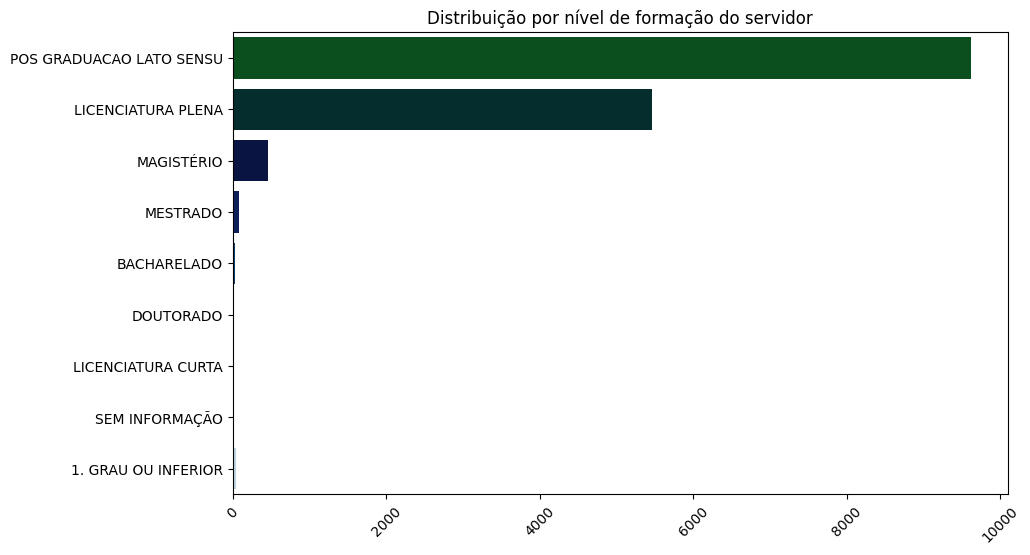

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(data =  df, y = 'NIVEL_FORM', palette = 'ocean')
plt.title('Distribuição por nível de formação do servidor')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show();

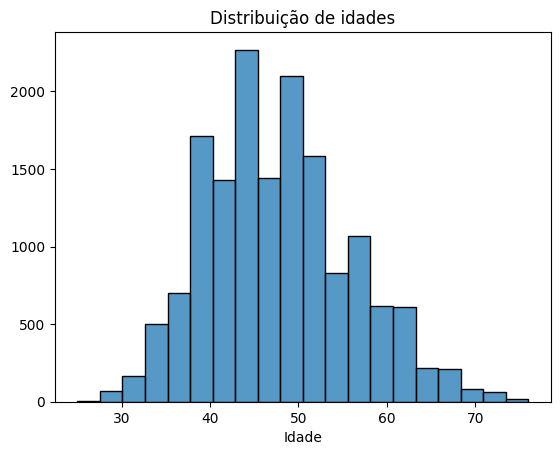

In [30]:
sns.histplot(data=df, x='IDADE_ATUALIZADA', bins=20)

plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('')
plt.show()

In [48]:
df['IDADE_ATUALIZADA'].agg(['mean', 'max', 'min', 'median']).reset_index()

,index,IDADE_ATUALIZADA
0,mean,47.727759
1,max,76.000000
2,min,25.000000
3,median,47.000000


#### A maior parte dos servidores tem entre 40 e 50 anos e a idade média é 47 anos.

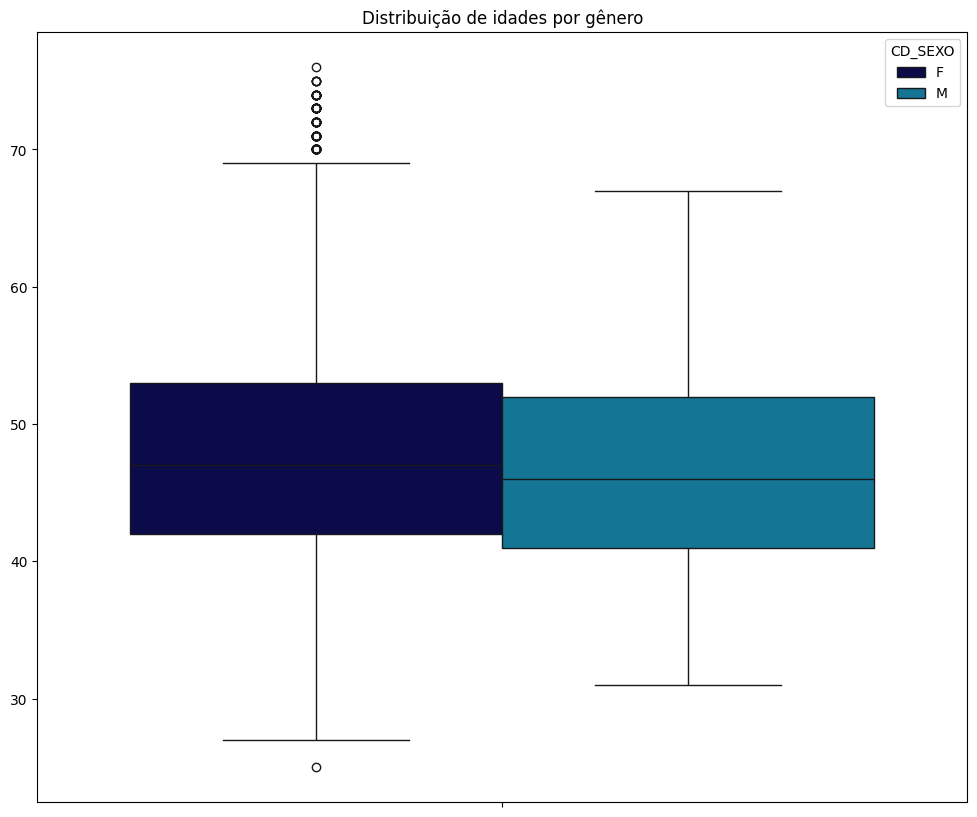

In [31]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df, y = 'IDADE_ATUALIZADA', hue = 'CD_SEXO', palette='ocean')
plt.title('Distribuição de idades por gênero')
plt.xlabel('')
plt.ylabel('')
plt.show()


#### Os gráficos de caixa nos informam que os servidores mais jovens e mais velhos são do gênero feminino.

In [32]:
df_frequencia = df[df['CD_SEXO'] == 'F']['NIVEL_FORM'].value_counts(dropna = False, normalize=True).reset_index() 
df_frequencia.columns = ['Nível de formação das mulheres', 'Proporção']
df_frequencia

,Nível de formação das mulheres,Proporção
0,POS GRADUACAO LATO SENSU,0.613558
1,LICENCIATURA PLENA,0.347435
2,MAGISTÉRIO,0.029368
3,MESTRADO,0.004528
4,1. GRAU OU INFERIOR,0.002458
5,BACHARELADO,0.001876
6,DOUTORADO,0.000517
7,LICENCIATURA CURTA,0.000129
8,SEM INFORMAÇÃO,0.000129


In [33]:
df_frequencia = df[df['CD_SEXO'] == 'M']['NIVEL_FORM'].value_counts(dropna = False, normalize=True).reset_index() 
df_frequencia.columns = ['Nível de formação dos homens', 'Proporção']
df_frequencia

,Nível de formação dos homens,Proporção
0,POS GRADUACAO LATO SENSU,0.562232
1,LICENCIATURA PLENA,0.373391
2,MAGISTÉRIO,0.038627
3,MESTRADO,0.021459
4,DOUTORADO,0.004292


#### Quando consideramos o gênero na análise do nível de formação, notamos que:
* Tanto no caso dos homens quanto no das mulheres, a maior parte dos profissionais da educação básica tem pós-graduação lato sensu (especialização).
* Em ambos os gêneros, a segunda formação mais recorrente é a licenciatura plena.
* Há uma proporção maior de homens com mestrado (2%) em comparação com as mulheres (0,3%), embora ambas as proporções de servidores com mestrado seja ínfima. O mesmo acontece no caso dos profissionais com doutorado: 0,05% de mulheres e 0,4% de homens.

In [34]:
df.groupby(['CD_SEXO', 'NIVEL_FORM'])['IDADE_ATUALIZADA'].mean().reset_index()

,CD_SEXO,NIVEL_FORM,IDADE_ATUALIZADA
0,F,1. GRAU OU INFERIOR,63.210526
1,F,BACHARELADO,52.137931
2,F,DOUTORADO,47.375000
3,F,LICENCIATURA CURTA,60.000000
4,F,LICENCIATURA PLENA,46.732638
5,F,MAGISTÉRIO,48.674009
6,F,MESTRADO,47.685714
7,F,POS GRADUACAO LATO SENSU,48.202425
8,F,SEM INFORMAÇÃO,41.000000
9,M,DOUTORADO,48.000000


#### As médias de idade de mulheres e homens com pós-graduação lato sensu são muito próximas (48 anos e 46 anos respectivamente), enquanto as mulheres com mestrado costumam ser um pouco mais velhas que os homens (47 anos e 41 anos, respectivamente). Profissionais com apenas o primeio grau ou menos são os mais velhos, apresentando idade média de 63 anos.

## Estudo dos cargos de liderança na educação básica

In [35]:
df['DC_CARGO_ATUAL'].value_counts().reset_index()

,DC_CARGO_ATUAL,count
0,PROF.DE ED.INFANTIL,15082
1,ASSISTENTE DE DIRETOR DE ESCOLA,311
2,COORDENADOR PEDAGOGICO,103
3,ASSISTENTE TECNICO DE EDUCACAO I,92
4,AUXILIAR DE DESENVOLVIMENTO INFANTIL,42
5,DIRETOR DE ESCOLA,34
6,GESTOR DE EQUIPAMENTO PUBLICO II,9
7,DIRETOR I,5
8,CHEFE DE NUCLEO DE ACAO EDUCACIONAL,4
9,ASSESSOR II,4


##### Para esta análise, vamos considerar como cargos de liderança os seguintes: 
* ASSISTENTE DE DIRETOR DE ESCOLA
* COORDENADOR PEDAGOGICO
* DIRETOR DE ESCOLA	
* CHEFE DE NUCLEO DE ACAO EDUCACIONAL
* ASSESSOR II
* ASSESSOR III
* SUPERVISOR ESCOLAR

In [36]:
#filtrando o df
cargos_lideranca = [
    'ASSISTENTE DE DIRETOR DE ESCOLA',
    'COORDENADOR PEDAGOGICO',
    'DIRETOR DE ESCOLA',
    'CHEFE DE NUCLEO DE ACAO EDUCACIONAL',
    'ASSESSOR II',
    'ASSESSOR III',
    'SUPERVISOR ESCOLAR'
]

df_lideranca = df[df['DC_CARGO_ATUAL'].isin(cargos_lideranca)]
df_lideranca.shape

(459, 19)

In [37]:
print(f'Existem {df_lideranca.shape[0]} servidores da educação básica ocupando cargos de liderança, o que representa {round((len(df_lideranca)/len(df)) * 100, 2)}% do total de servidores deste segmento.')

Existem 459 servidores da educação básica ocupando cargos de liderança, o que representa 2.93% do total de servidores deste segmento.


### Qual é a idade predominante dos servidores em cargos de liderança?

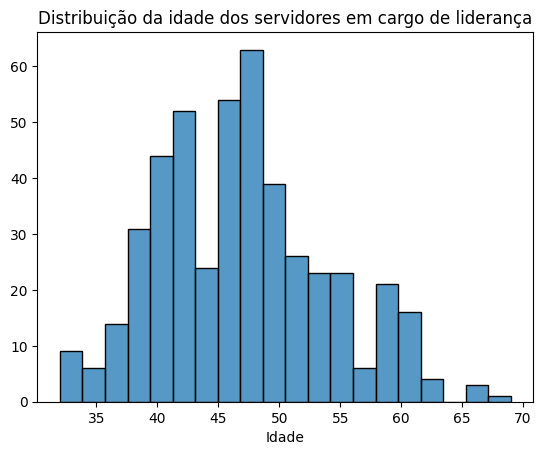

In [38]:
sns.histplot(data = df_lideranca, x = 'IDADE_ATUALIZADA', bins = 20)
plt.title('Distribuição da idade dos servidores em cargo de liderança')
plt.ylabel('')
plt.xlabel('Idade')
plt.show()

In [52]:
df_lideranca['IDADE_ATUALIZADA'].agg(['mean', 'median', 'max', 'min']).reset_index().T

,0,1,2,3
index,mean,median,max,min
IDADE_ATUALIZADA,46.936819,46.0,69.0,32.0


#### Ao analisarmos a idade dos servidores em cargos de liderança na área da educação infantil, descobrimos as seguintes informações:
* O servidor mais novo em cargo de liderança tem 32 anos, enquanto o mais velho tem 69 anos.
* A idade média é 47 anos, mas, embora a maior parte tenha essa idade, há uma quantidade significativa de servidores com quarenta e poucos anos. 
* Servidores com menos de 35 anos e mais de 60 são mais raros em cargos de liderança. Um sinal de preconceito com profissionais mais velhos?

### Qual é a quantidade de servidores em cargos de liderança de acordo com a cor?

/tmp/ipykernel_4851/328874964.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




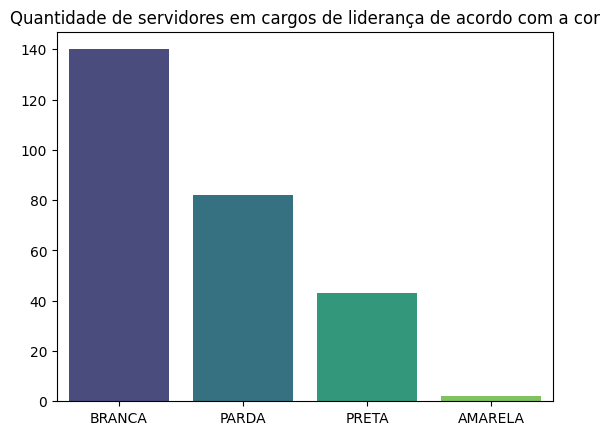

In [55]:
df_cor_filtrada = df_lideranca.query('DC_RACA_COR != "NAO INFORMADA"')
sns.countplot(data = df_cor_filtrada, x='DC_RACA_COR', palette='viridis')
plt.ylabel('')
plt.xlabel('')
plt.title('Quantidade de servidores em cargos de liderança de acordo com a cor')
plt.show()

In [39]:

df_cor_filtrada_agrupada = df_cor_filtrada.groupby('DC_RACA_COR')['DC_CARGO_ATUAL'].value_counts().reset_index(name='CONTAGEM')
df_cor_filtrada_agrupada['PORCENTAGEM'] = round((df_cor_filtrada_agrupada['CONTAGEM'] / df_cor_filtrada_agrupada.groupby('DC_RACA_COR')['CONTAGEM'].transform('sum')) * 100, 2)
df_cor_filtrada_agrupada

,DC_RACA_COR,DC_CARGO_ATUAL,CONTAGEM,PORCENTAGEM
0,AMARELA,ASSISTENTE DE DIRETOR DE ESCOLA,2,100.00
1,BRANCA,ASSISTENTE DE DIRETOR DE ESCOLA,92,65.71
2,BRANCA,COORDENADOR PEDAGOGICO,31,22.14
3,BRANCA,DIRETOR DE ESCOLA,16,11.43
4,BRANCA,CHEFE DE NUCLEO DE ACAO EDUCACIONAL,1,0.71
5,PARDA,ASSISTENTE DE DIRETOR DE ESCOLA,49,59.76
6,PARDA,COORDENADOR PEDAGOGICO,25,30.49
7,PARDA,DIRETOR DE ESCOLA,6,7.32
8,PARDA,ASSESSOR III,1,1.22
9,PARDA,CHEFE DE NUCLEO DE ACAO EDUCACIONAL,1,1.22


#### Observamos que a maior parte dos servidores se autodeclararam brancos, enquanto a quantidade de profissionais autodeclarados amarelos é ínfima (apenas 2 servidores, todos ocupando o cargo de assistente de diretor de escola). Pardos ocupam a segunda posição, e os pretos, a terceira.

#### Os servidores brancos são os que aparecem em maior proporção no cargo de diretor de escola (11,43%), seguidos dos pardos (7,32%) e pretos (4,65%).

#### Já no cargo de coordenador pedagógico, a população parda se destaca em relação às outras cores. 30,5% dos pardos ocupam este cargo, enquanto 22% dos brancos  e 16% dos pretos são coordenadores.

#### No entanto, o cargo que apresenta a maior proporção ed servidores em todas as cores é o de assitente de diretor de escola: 65,7% dos brancos, 59,7% dos pardos e 74,4% dos pretos ocupam este cargo.

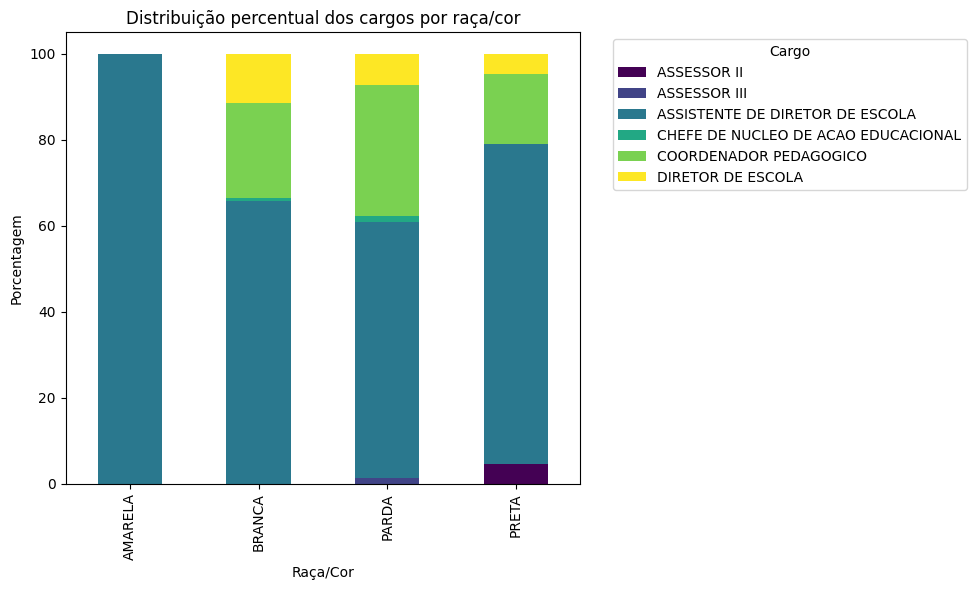

In [40]:
df_pivot = df_cor_filtrada_agrupada.pivot(index='DC_RACA_COR', columns='DC_CARGO_ATUAL', values='PORCENTAGEM')


df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')


plt.ylabel('Porcentagem')
plt.xlabel('Raça/Cor')
plt.title('Distribuição percentual dos cargos por raça/cor')
plt.legend(title='Cargo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:

fig = px.bar(df_cor_filtrada_agrupada, y='DC_CARGO_ATUAL', x='CONTAGEM', color='DC_RACA_COR', orientation='h',
             color_discrete_map={'PRETA': '#000000', 'PARDA': '#A0522D', 'AMARELA': '#F0E68C', 'BRANCA': '#FFFFF0'})

fig.show()

### Analisando mais detidamente a população negra

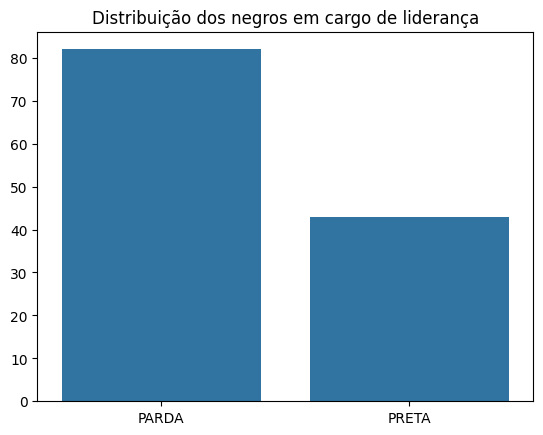

In [59]:
filtro_negros = df_lideranca.query("DC_RACA_COR == 'PRETA' or DC_RACA_COR == 'PARDA'")
sns.countplot(data = filtro_negros, x = 'DC_RACA_COR')
plt.title('Distribuição dos negros em cargo de liderança')
plt.xlabel('')
plt.ylabel('')

plt.show()


#### Há praticamente o dobro da quantidade de pardos em cargos de liderança, em comparação com a quantidade de pretos.

In [43]:
contagem = filtro_negros.groupby(['DC_CARGO_ATUAL', 'DC_RACA_COR']).size().reset_index(name='Contagem') 
contagem['Porcentagem'] = contagem.groupby('DC_CARGO_ATUAL')['Contagem'].transform(lambda x: (x / x.sum()) * 100)

fig = px.bar(contagem, y='DC_CARGO_ATUAL', x='Porcentagem', color='DC_RACA_COR', orientation='h',
             color_discrete_map={'PRETA': '#000000', 'PARDA': '#A0522D'})



fig.show()

#### A proporção de pardos nos cargos de direção, coordenação e assistência à direção é bem maior que a de pretos.

### E de acordo com o gênero?

In [44]:
df_genero_filtrada_agrupada = df_lideranca.groupby('CD_SEXO')['DC_CARGO_ATUAL'].value_counts().reset_index(name='CONTAGEM')
df_genero_filtrada_agrupada['PORCENTAGEM'] = round((df_genero_filtrada_agrupada['CONTAGEM'] / df_genero_filtrada_agrupada.groupby('CD_SEXO')['CONTAGEM'].transform('sum')) * 100, 2)
df_genero_filtrada_agrupada

,CD_SEXO,DC_CARGO_ATUAL,CONTAGEM,PORCENTAGEM
0,F,ASSISTENTE DE DIRETOR DE ESCOLA,296,67.12
1,F,COORDENADOR PEDAGOGICO,100,22.68
2,F,DIRETOR DE ESCOLA,34,7.71
3,F,ASSESSOR II,4,0.91
4,F,CHEFE DE NUCLEO DE ACAO EDUCACIONAL,4,0.91
5,F,ASSESSOR III,2,0.45
6,F,SUPERVISOR ESCOLAR,1,0.23
7,M,ASSISTENTE DE DIRETOR DE ESCOLA,15,83.33
8,M,COORDENADOR PEDAGOGICO,3,16.67


In [61]:
fig = px.bar(df_genero_filtrada_agrupada, y='DC_CARGO_ATUAL', x='PORCENTAGEM', color='CD_SEXO', orientation='h',
             color_discrete_map={'F': '#8B0000', 'M': '#3CB371'})



fig.show()

#### Observamos que as pessoas no gênero masculino em cargo de liderança assumem apenas 2 cargos: assistente de diretor de escola (83% dos homens) e coordenador pedagógico (16,6%).

#### Os cargos de direção de escola são ocupados apenas por mulheres. Também existe uma proporção maior de mulheres no cargo de coordenação (22,6%).